# Lab 3
- EC9630: Machine Learning
- Artificial Neural Networks

- 2019/E/136
- SUBASINGE S.A.B.D.

In [ ]:
# Q01
from tensorflow import keras
import numpy as np
# load data set
(x_train,y_train), (x_test,y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step



(a) Find out whether it can be used for regression or classification.


In [ ]:
num_classes = len(set(y_train))
print("# of classesL:",num_classes)

# of classesL: 10


- so 10 classes have as above mensioned 
we can use this as both two ways

(b) What is the size of the images?


In [ ]:
from re import I
# select first image froim training data set
image_index=0
image_for_size_print=x_train[image_index]
# print the size of the image
print("image size: ",image_for_size_print.shape)

image size:  (28, 28)


(c) How many images are there in the train data?


In [ ]:
print("train data shape: ", x_train.shape)

train data shape:  (60000, 28, 28)


(d) State the number of images in test data.


In [ ]:
print("test data shape: ", x_test.shape)

test data shape:  (10000, 28, 28)


(e) How many classes are there in the data? Write down those classes.

the 10 different classes mensioned above, as following:

- 0: T-shirt/top;
- 1: Trouser;
- 2: Pullover;
- 3: Dress;
- 4: Coat;
- 5: Sandal;
- 6: Shirt;
- 7: Sneaker;
- 8: Bag;
- 9: Ankle boot.
- Image dimmensions are 28x28.

2. Load that dataset directly from Keras using Python.

In [ ]:
# done



3. View some images in training data, for example draw the 11th image
in your training data.


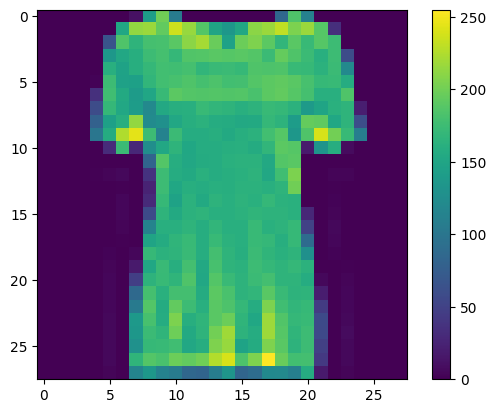

In [ ]:
import matplotlib.pyplot as plt


# select 11 th image
image_index_11th=10
image=x_train[image_for_size_print]
label=y_train[image_index]

# define class label
class_labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot the image
plt.figure()
plt.imshow(x_train[10])
plt.colorbar()
plt.grid(False)
plt.show()

4. Normalize your data (train and test) between 0 and 1.
Hint: This is a grayscale image has pixel values between 0 and 255.


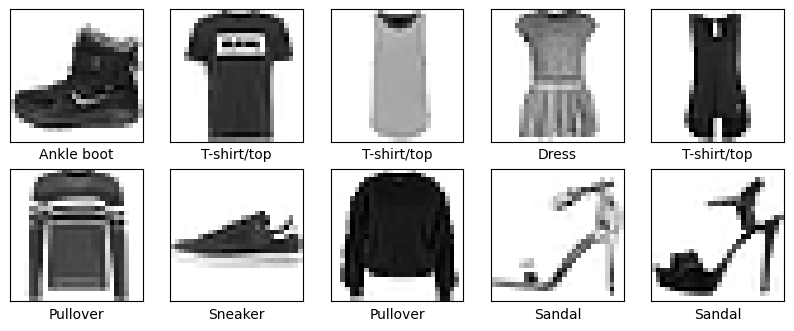

In [ ]:
# image normalization
train_images = x_train / 255.0
test_images = x_test / 255.0

# plot first 10 figures(normalized)
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_labels[y_train[i]])
plt.show()

5. Now divide the training data into two: Validation images (first 5000
images from the initial training data) and Training images (rest of the
images in your initial training data).

In [ ]:
validation_images = train_images[:5000]

validation_labels = test_images[:5000]

train_images = train_images[5000:]

train_labels = test_images[5000:]

6. Initialize the weight and bias parameters of your model.

7. Now build the neural network model with the following characteristics:

(a) One Flatten layer as the input layer.

(b) Two dense relu layers as hidden layers.


(c) A dense softmax layer as the output layer.

In [ ]:
import tensorflow as tf
# 10 soft max for differant classes
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

8. Answer the following questions.

(a) What is the use of Flatten layer?

makes the  input flat. has no impact on  batch size. Data  is flattened when  it is made into a 1-dimensional array for  input into the  following layer. We flatten  the convolutional layer output to produce a solitary, lengthy feature vector. An image is processed more 
 effectively by a neural network in particular architectures, such as  CNN,  if it is in 1D  format rather  than 2D.

(b) Generally, softmax activation function is used in the output layer
of the classification networks. Why?



softmax can be use to classify image or anything as below, but practicall the values will be 0-1 probability values
https://www.turing.com/kb/softmax-multiclass-neural-networks
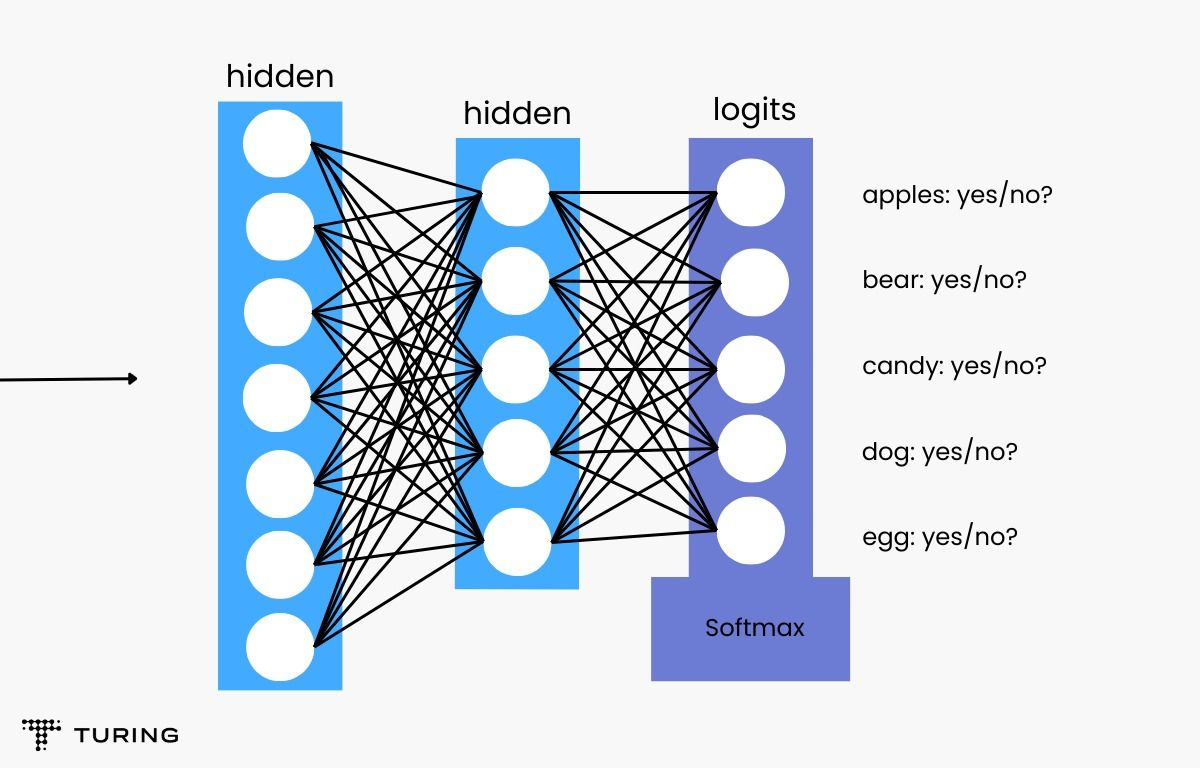

9. Print the summary of the network.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


10. Now compile the model with the desired loss function, optimizer and
metrics.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

11. Now train your model on the training data and validate your model.


In [ ]:
model.fit(train_images, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1719/1719 [==============================] - 6s 3ms/step - loss: 0.5075 - accuracy: 0.8203
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3749 - accuracy: 0.8637
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3397 - accuracy: 0.8754
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3143 - accuracy: 0.8843
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8909
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2817 - accuracy: 0.8950
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.9001
Epoch 8/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2576 - accuracy: 0.9036
Epoch 9/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2493 - accuracy: 0.9070
Epoch 10/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2385 - accurac

12. Evaluate your model on the test data. What is the accuracy of your
model on the test data?

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images,  y_test, verbose=2)

print('\nmodel accuracy:', test_accuracy)
print('\ntest loss',test_loss)

313/313 - 1s - loss: 0.3421 - accuracy: 0.8837 - 509ms/epoch - 2ms/step

model accuracy: 0.8837000131607056

test loss 0.34213733673095703


13. Now take the first five samples of test data. Print the actual target
classes and the predicted target classes of those five samples.


In [ ]:
import numpy as np
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
# predict first five images
print(np.argmax(predictions[0]),
np.argmax(predictions[1]),
np.argmax(predictions[2]),
np.argmax(predictions[3]),
np.argmax(predictions[4]))



313/313 [==============================] - 1s 2ms/step
9 2 1 1 6


the 10 different classes mensioned above, as following:

- 0: T-shirt/top;
- 1: Trouser;
- 2: Pullover;
- 3: Dress;
- 4: Coat;
- 5: Sandal;
- 6: Shirt;
- 7: Sneaker;
- 8: Bag;
- 9: Ankle boot.
- Image dimmensions are 28x28.

now chose first five pictures to see wheter answer is correct or not

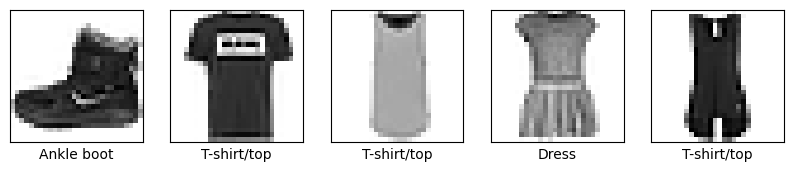

In [ ]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image[i], cmap=plt.cm.binary)
    plt.xlabel(class_labels[y_train[i]])
plt.show()